# Test de l'opérateur ProblemDiscontinuE

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path

In [2]:
from src.main_discontinu import *
from src.time_problem import *
from src.plot_fields import *
from src.plot_stats import *

%matplotlib widget
rc("figure", figsize=(10, 5))
rc("figure", dpi=100)

## Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [3]:
n_lim = 10**5
t_fin_lim = 0.2

In [4]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop = NumericalProperties(
    dx=3.9 * 10**-5, schema="upwind", time_scheme="euler", phy_prop=phy_prop, cfl=0.5
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
# markers.shift(0.00001)
# markers = Bulles(phy_prop=phy_prop)

Monofluid convection :  upwind

Energie
dt fourier
6.918433404737903e-06
Db / dx = 30
Interface interp type :  Ti
Face interp :  quick
Time integration method for surfaces : exact
dE*/dt* = 2.3716e-19


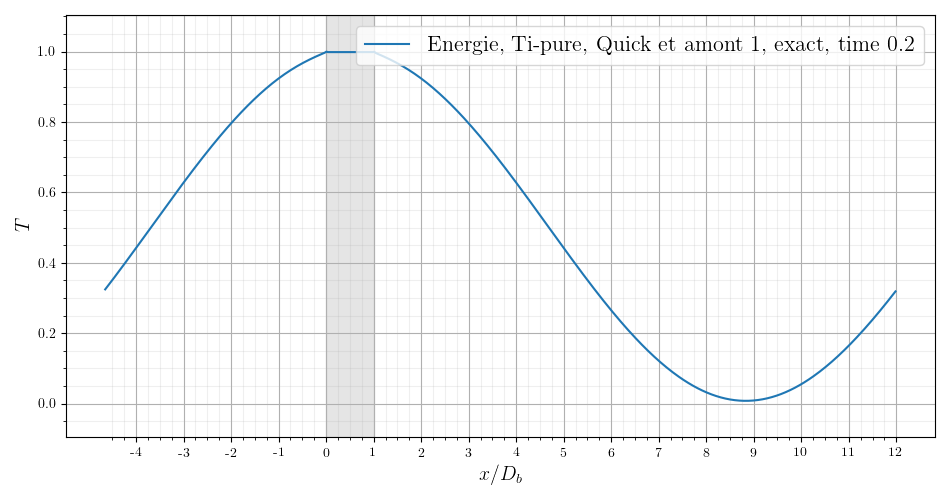

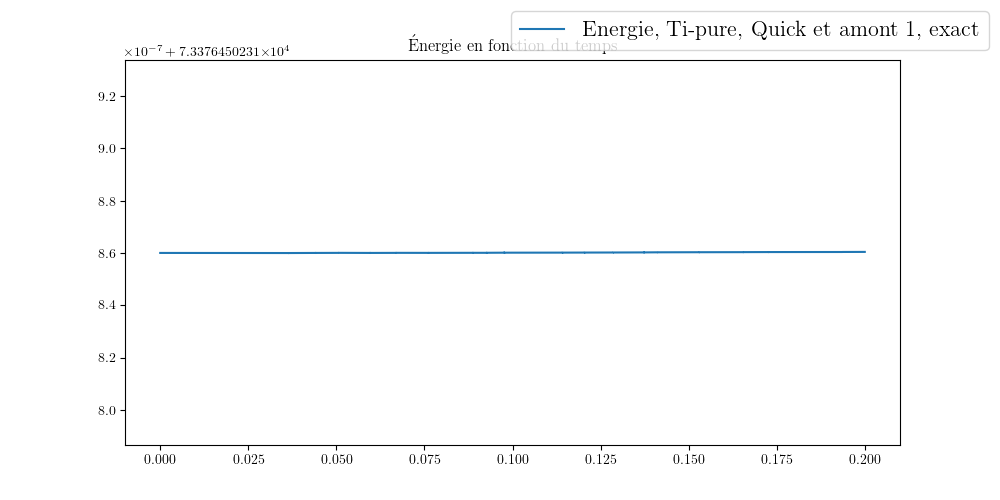

In [7]:
t_fin = 0.2
num_prop_Ti = deepcopy(num_prop)
num_prop_Ti.interp_type = "Ti"
prob = TimeProblem(
    get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop, problem_state=StateProblemDiscontinuE
)
# print(prob.name)
print("==========================")
plot = Plotter("classic")
t, e = prob.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

Monofluid convection :  upwind

Energie
dt fourier
6.918433404737903e-06
Db / dx = 30
Interface interp type :  gradTi
Face interp :  quick
Time integration method for surfaces : exact


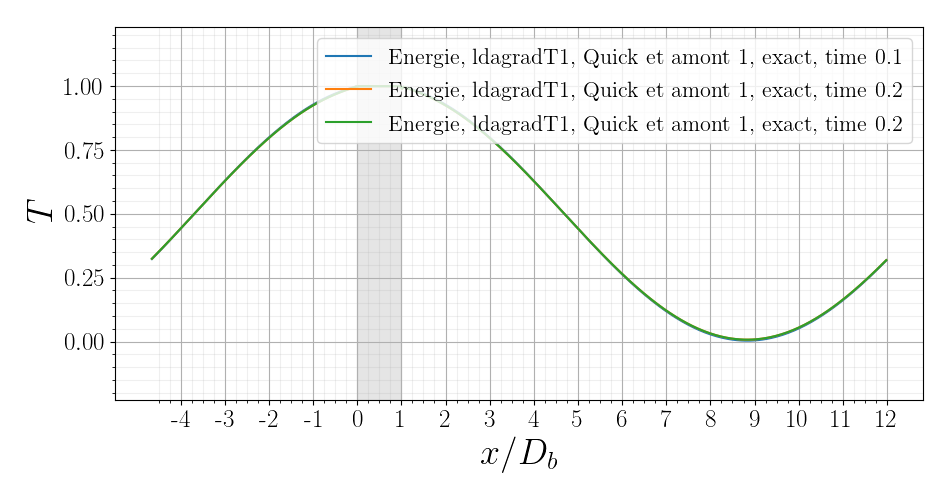

In [15]:
t_fin = 0.2
num_prop_grad = deepcopy(num_prop)
num_prop_grad.interp_type = "gradTi"
prob_grad = TimeProblem(
    get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop_grad, problem_state=StateProblemDiscontinuE
)
# print(prob.name)
t, e = prob_grad.timestep(
    n=n_lim, t_fin=min(t_fin, t_fin_lim), number_of_plots=2,
)


$T_l$, Energie, ldagradT1, Quick et amont 1, exact
dT/dt = 0.0035429

$T_v$, Energie, ldagradT1, Quick et amont 1, exact
dT/dt = -0.00555054


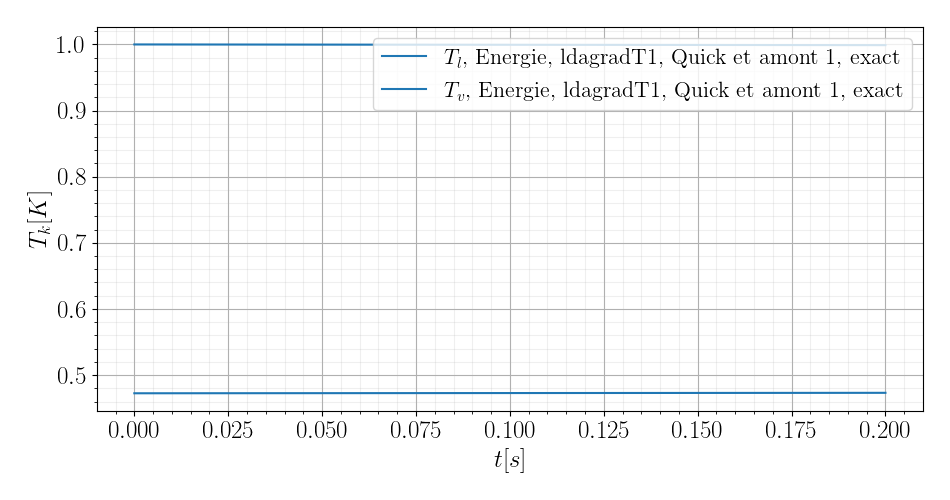

In [16]:
plot_temp = TemperaturePlot()
plot_temp.plot_tpb(prob_grad)
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')


Energie
dt fourier
6.918433404737903e-06
Db / dx = 30
Monofluid convection :  upwind
Interface interp type :  Ti
Face interp :  quick
Time integration method for surfaces : exact


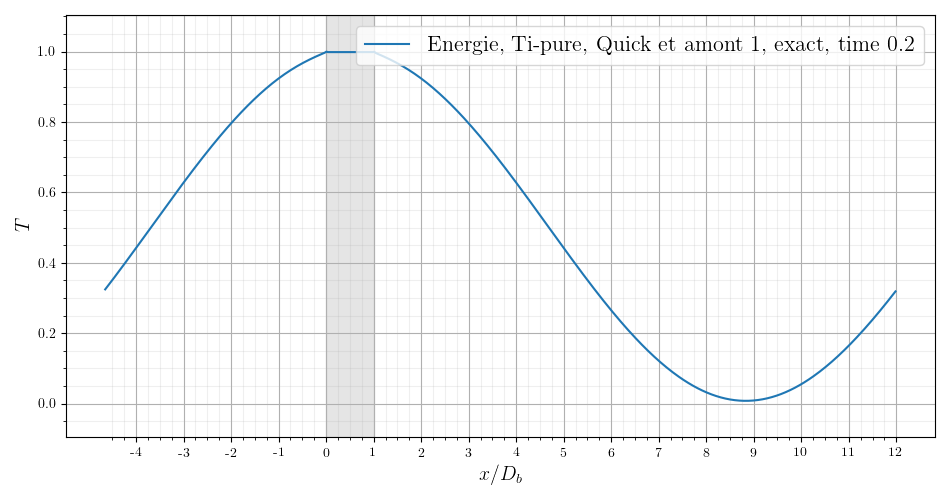

In [5]:
t_fin = 0.2
num_prop_grad2 = deepcopy(num_prop)
num_prop_grad2.interp_type = "gradTi2"
prob_grad2 = TimeProblem(
    get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop, problem_state=StateProblemDiscontinuE
)
t, e = prob_grad2.timestep(n=n_lim, t_fin=min(t_fin, t_fin_lim))


$T_l$, Energie, Ti-pure, Quick et amont 1, exact
dT/dt = 0.0036378

$T_v$, Energie, Ti-pure, Quick et amont 1, exact
dT/dt = -0.00569922


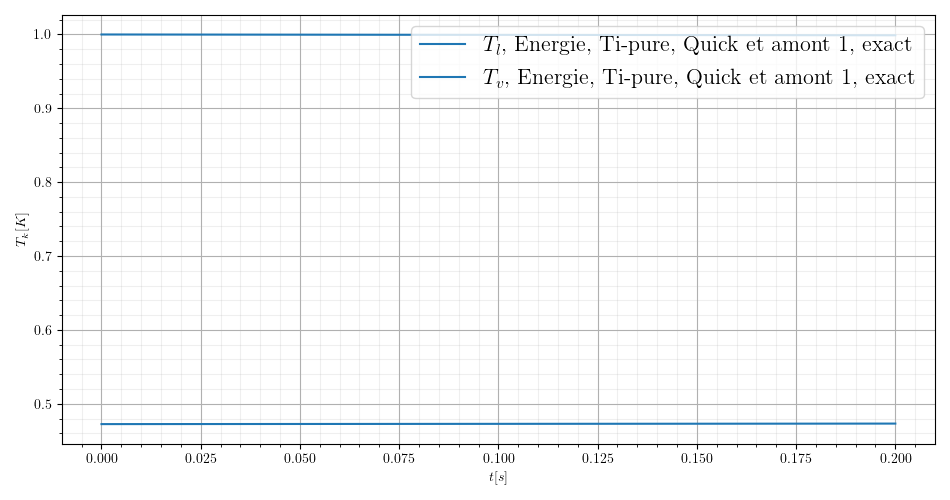

In [6]:
plot_temp = TemperaturePlot()
plot_temp.plot_tpb(prob_grad2)

## Test de la convection

Ici on met une vitesse de convection, et on supprime artificiellement la diffusion.

Pour augmenter la facilité du cas, on le réalise sur une température initiale continue.

In [16]:
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=0.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop_conv = NumericalProperties(
    dx=1 * 10**-5,
    schema="upwind",
    time_scheme="euler",
    phy_prop=phy_prop,
    cfl=0.5,
    fo=1.*10**100,
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
# markers.shift(0.00001)


Energie
dt cfl
2.501250625312656e-05
Db / dx = 119
Monofluid convection :  upwind
Interface interp type :  Ti
Face interp :  quick
Time integration method for surfaces : exact


/home/as259691/PycharmProjects/FluidDyn1D/src/interpolation_methods.py:22: RuntimeWarning: overflow encountered in multiply
  return 1.0 / dx * (flux[1:] - flux[:-1]).view(np.ndarray)
/home/as259691/PycharmProjects/FluidDyn1D/venv-flu1d/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/as259691/PycharmProjects/FluidDyn1D/src/statistics.py:55: RuntimeWarning: invalid value encountered in multiply
  pb.T * pb.rho_cp.a(pb.I) * (1.0 - pb.I)
/home/as259691/PycharmProjects/FluidDyn1D/src/statistics.py:65: RuntimeWarning: invalid value encountered in multiply
  self.time_stats["Tv"][self.step] = np.sum(pb.T * (1.0 - pb.I)) / np.sum(
/home/as259691/PycharmProjects/FluidDyn1D/src/cells_interface.py:195: RuntimeWarning: invalid value encountered in double_scalars
  lda_grad_T_ig = self.ldag * (T_i - Tg) / dg
/home/as259691/PycharmProjects/FluidDyn1D/src/interpolation_metho

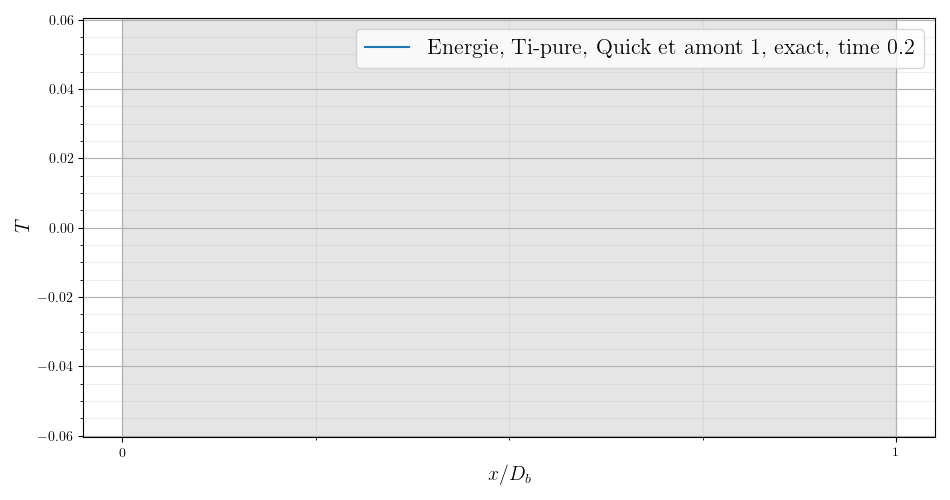

In [17]:
num_prop_conv_Ti = deepcopy(num_prop_conv)
num_prop_conv_Ti.interp_type = "Ti"
prob_conv_Ti = TimeProblem(
    get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop_conv_Ti, problem_state=StateProblemDiscontinuE
)
t, e = prob_conv_Ti.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim )


$T_l$, Energie, Ti-pure, Quick et amont 1, exact
dT/dt = -0.0117024

$T_v$, Energie, Ti-pure, Quick et amont 1, exact
dT/dt = 0.0183338


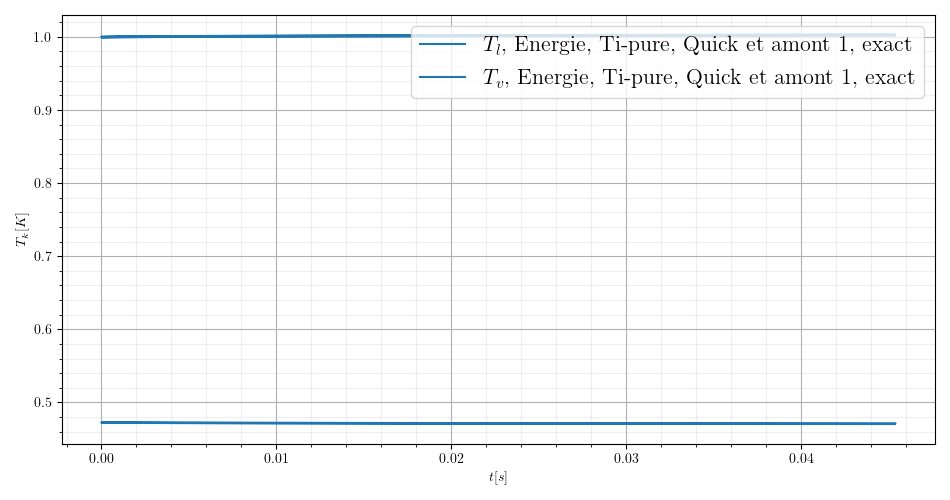

In [14]:
plot_temp = TemperaturePlot()
plot_temp.plot_tpb(prob_conv_Ti)

In [15]:
num_prop_conv_grad = deepcopy(num_prop_conv)
num_prop_conv_grad.interp_type="gradTi"
prob_conv_grad = TimeProblem(
    get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop_conv_grad, problem_state=StateProblemDiscontinuE, 
)
t, e = prob_conv_grad.timestep(n=n, t_fin=t_fin)


Energie
dt fourier
4.538601983461999e-07
Db / dx = 119
Monofluid convection :  upwind
Interface interp type :  gradTi
Face interp :  quick
Time integration method for surfaces : exact


NameError: name 'n' is not defined

In [ ]:
plot_temp = TemperaturePlot()
plot_temp.plot_tpb(prob_conv_grad)

In [ ]:
num_prop_conv_grad2 = deepcopy(num_prop_conv)
num_prop_conv_grad2.interp_type="gradTi2"
prob_conv_grad2 = TimeProblem(
    get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop_conv_grad2, problem_state=StateProblemDiscontinuE,
)
t, e = prob_conv_grad2.timestep(n=n, t_fin=t_fin)

In [ ]:
plot_temp = TemperaturePlot()
plot_temp.plot_tpb(prob_conv_grad2)

# Probleme discontinu traité en déduisant $T_g^c$ et $T_d^c$ de T et h

In [ ]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=0.0,
    alpha=0.06,
    a_i=357.0,
)
# num_prop = NumericalProperties(dx=3.9*10**-5, schema='upwind', time_scheme='euler', phy_prop=phy_prop, cfl=0.5)
num_prop = NumericalProperties(
    dx=1 * 10**-5, schema="upwind", time_scheme="euler", phy_prop=phy_prop, cfl=1.0
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
# markers.shift(0.00001)
# markers = Bulles(phy_prop=phy_prop)

n_max = 300
# t_fin = 0.01

In [ ]:
prob_EnTemp = TimeProblem(
    get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop, problem_state=StateProblemDiscontinuEnergieTemperature
)
t, e = prob_EnTemp.timestep(n=min(n_max, n_lim))

In [ ]:
plot_en = EnergiePlot()
plot_en.plot_tpb(prob_EnTemp)

# Test ProblemDiscontinuFT

## Juste la diffusion

In [ ]:
n_lim = 1
t_fin_lim = 0.01

In [ ]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
# num_prop = NumericalProperties(dx=3.9*10**-5, schema='upwind', time_scheme='euler', phy_prop=phy_prop, cfl=0.5)
num_prop = NumericalProperties(
    dx=1 * 10**-5, schema="upwind", time_scheme="euler", phy_prop=phy_prop, cfl=1.0
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
# markers.shift(0.00001)
# markers = Bulles(phy_prop=phy_prop)

n_lim = 10000000
n_max = 60000
# t_fin = 0.01

In [ ]:
print()
prob = ProblemDiscontinuFT(get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob.energy
# print(prob.name)
print("==========================")
plot = Plotter("classic")
t, e = prob.timestep(n=min(n_max, n_lim), number_of_plots=3, plotter=plot)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)
plt.figure()
plt.plot(prob.num_prop.x, prob.rho_cp_a * prob.T)
print(prob.T)

## Juste la convection

In [ ]:
n_lim = 1
t_fin_lim = 0.01

In [ ]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=0.0,
    alpha=0.06,
    a_i=357.0,
)
# num_prop = NumericalProperties(dx=3.9*10**-5, schema='upwind', time_scheme='euler', phy_prop=phy_prop, cfl=0.5)
num_prop = NumericalProperties(
    dx=1 * 10**-5, schema="upwind", time_scheme="euler", phy_prop=phy_prop, cfl=1.0
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
# markers.shift(0.00001)
# markers = Bulles(phy_prop=phy_prop)

n_lim = 10000
n_max = 6000
# t_fin = 0.01

In [ ]:
print()
prob = ProblemDiscontinuFT(get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob.energy
# print(prob.name)
print("==========================")
plot = Plotter("classic")
t, e = prob.timestep(n=min(n_max, n_lim), number_of_plots=3, plotter=plot)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)
plt.figure()
plt.plot(prob.num_prop.x, prob.rho_cp_a * prob.T)
print(prob.T)

## Avec diffusion aussi

In [ ]:
n_lim = 10000000
t_fin_lim = 0.01

In [ ]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
# num_prop = NumericalProperties(dx=3.9*10**-5, schema='upwind', time_scheme='euler', phy_prop=phy_prop, cfl=0.5)
num_prop = NumericalProperties(
    dx=1 * 10**-5, schema="upwind", time_scheme="euler", phy_prop=phy_prop, cfl=1.0
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
# markers.shift(0.00001)
# markers = Bulles(phy_prop=phy_prop)

n_max = 60000000000
t_fin = 0.2
# t_fin = 0.01

In [ ]:
print()
prob = ProblemDiscontinuFT(
    get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop
)
E0 = prob.energy
# print(prob.name)
print("==========================")
plot = Plotter("classic")
t, e = prob.timestep(
    t_fin=min(t_fin, t_fin_lim), n=min(n_max, n_lim), number_of_plots=2, plotter=plot
)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)
plt.figure()
plt.plot(prob.num_prop.x, prob.rho_cp_a * prob.T)
print(prob.T)